In [2]:
import pandas as pd
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Choose a classification dataset and normalize features.

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv("Iris.csv")

# Drop 'Id' because it's just a serial number, not a feature
df = df.drop(columns=['Id'])

# Separate features and target
X = df.drop(columns=['Species'])
y = df['Species']

# Initialize scaler
scaler = MinMaxScaler()

# Normalize numerical features
X_normalized = scaler.fit_transform(X)

# Convert back to DataFrame
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

print("First 5 rows of normalized features:")
print(X_normalized.head())


First 5 rows of normalized features:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0       0.222222      0.625000       0.067797      0.041667
1       0.166667      0.416667       0.067797      0.041667
2       0.111111      0.500000       0.050847      0.041667
3       0.083333      0.458333       0.084746      0.041667
4       0.194444      0.666667       0.067797      0.041667


Use KNeighborsClassifier from sklearn.

In [4]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Load dataset
df = pd.read_csv("Iris.csv")

# 2. Drop 'Id' column (not a feature)
df = df.drop(columns=['Id'])

# 3. Separate features (X) and target (y)
X = df.drop(columns=['Species'])
y = df['Species']

# 4. Normalize features using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42
)

# 6. Initialize KNeighborsClassifier (k=5)
knn = KNeighborsClassifier(n_neighbors=5)

# 7. Train the model
knn.fit(X_train, y_train)

# 8. Make predictions
y_pred = knn.predict(X_test)

# 9. Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Experiment with different values of K

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("Iris.csv")
df = df.drop(columns=['Id'])

# Separate features and target
X = df.drop(columns=['Species'])
y = df['Species']

# Normalize features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42
)

# Test different values of k
accuracy_results = {}
for k in range(1, 21):  # k from 1 to 20
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[k] = accuracy

# Display results
for k, acc in accuracy_results.items():
    print(f"K={k}: Accuracy = {acc:.4f}")


K=1: Accuracy = 1.0000
K=2: Accuracy = 1.0000
K=3: Accuracy = 1.0000
K=4: Accuracy = 1.0000
K=5: Accuracy = 1.0000
K=6: Accuracy = 1.0000
K=7: Accuracy = 1.0000
K=8: Accuracy = 1.0000
K=9: Accuracy = 1.0000
K=10: Accuracy = 1.0000
K=11: Accuracy = 1.0000
K=12: Accuracy = 1.0000
K=13: Accuracy = 1.0000
K=14: Accuracy = 1.0000
K=15: Accuracy = 1.0000
K=16: Accuracy = 1.0000
K=17: Accuracy = 1.0000
K=18: Accuracy = 1.0000
K=19: Accuracy = 1.0000
K=20: Accuracy = 1.0000


Evaluate model using accuracy, confusion matrix

Accuracy for K=5: 1.0000

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


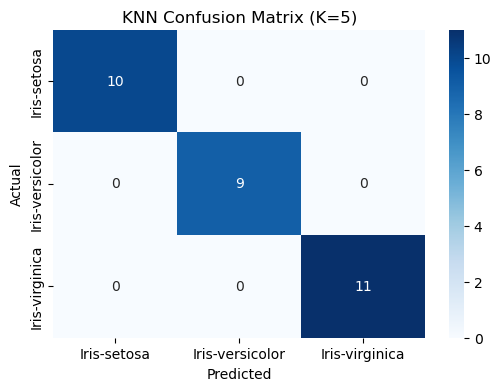

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("Iris.csv")
df = df.drop(columns=['Id'])

# 2. Separate features and target
X = df.drop(columns=['Species'])
y = df['Species']

# 3. Normalize features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42
)

# 5. Initialize and train KNN
k = 5  # you can set this to the best K found
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# 6. Make predictions
y_pred = knn.predict(X_test)

# 7. Evaluate model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy for K={k}: {accuracy:.4f}")
print("\nConfusion Matrix:\n", cm)

# 8. Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=knn.classes_,
            yticklabels=knn.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"KNN Confusion Matrix (K={k})")
plt.show()


Visualize decision boundaries.

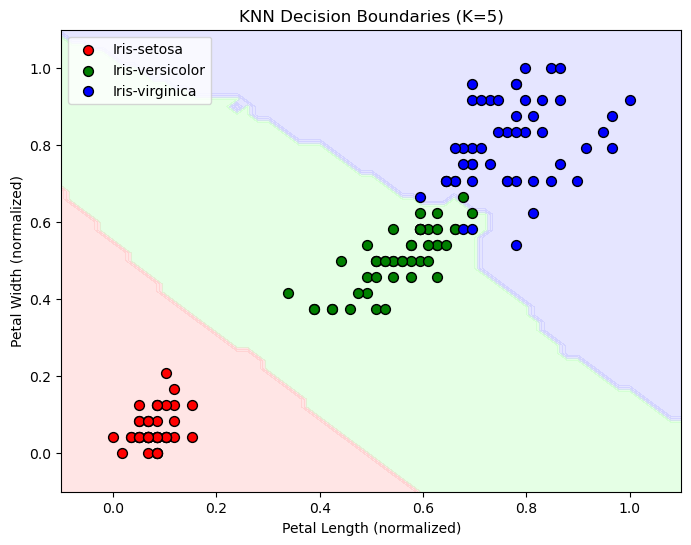

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 1. Load dataset
df = pd.read_csv("Iris.csv")
df = df.drop(columns=['Id'])

# 2. Choose only two features for visualization
X = df[['PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# 3. Encode species names as numbers for plotting
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 4. Normalize features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y_encoded, test_size=0.2, random_state=42
)

# 6. Train KNN
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# 7. Create a meshgrid
h = 0.02
x_min, x_max = X_normalized[:, 0].min() - 0.1, X_normalized[:, 0].max() + 0.1
y_min, y_max = X_normalized[:, 1].min() - 0.1, X_normalized[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# 8. Predict for grid points
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 9. Plot decision boundaries
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

# Scatter plot actual data points
for i, color in zip(range(len(label_encoder.classes_)), cmap_bold):
    plt.scatter(X_normalized[y_encoded == i, 0],
                X_normalized[y_encoded == i, 1],
                c=color, label=label_encoder.classes_[i],
                edgecolor='k', s=50)

plt.xlabel('Petal Length (normalized)')
plt.ylabel('Petal Width (normalized)')
plt.title(f"KNN Decision Boundaries (K={k})")
plt.legend()
plt.show()
